# $$\text{The Birthday Paradox}$$


Given a randomly selected number of people, what is the probability to find a pair (or more) that shares the same date of birth. The assumptions is that the distribution of the date of birth is uniform. In other words, all dates are equally likely to be picked.

In [37]:
import numpy as np
import random as rn
from datetime import timedelta
import matplotlib.pyplot as plt

In [28]:
# A function that generates a random birthdate

def random_birthdate(start, end):
    random_days = rn.randrange((end - start).days)
    return start + timedelta(days=random_days)

In [87]:
def run_simulation(n_simulations, n_people):
    record = []
    for i in range(n_simulations):
        birthdays = []
        for j in range(n_people):
            birthdays.append(random_birthdate(datetime.date(1999, 1, 1), 
                                              datetime.date(1999, 12, 31)))
        record.append(len(birthdays) - len(set(birthdays)))
    return record

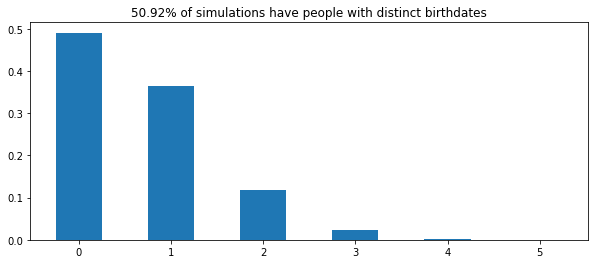

In [88]:
# Simulation for 10,000 times with 23 people

plt.figure(figsize=(10, 4))
sim = run_simulation(10**4, 23)
plt.hist(sim, align='mid', bins=np.arange(0, 7)-0.5, rwidth=.5, density=True)
plt.title('{0:.2%} of simulations have people with distinct birthdates'\
          .format(np.count_nonzero(np.array(sim)!=0)/len(sim)))
plt.show()

In [89]:
record_23 = []
for i in range(100, 10**4, 100):
    if i%(10**3)==0: print('{0:.0%}'.format(i/10**4))
    sim = sim = run_simulation(i, 23)
    record_23.append(np.count_nonzero(np.array(sim)!=0)/len(sim))

10%
20%
30%
40%
50%
60%
70%
80%
90%


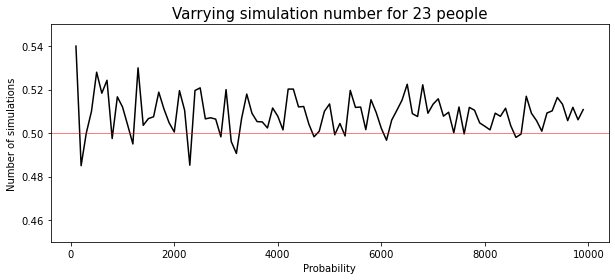

In [99]:
plt.figure(figsize=(10, 4))
plt.plot(range(100, 10**4, 100), record_23, color='black')
plt.axhline(.5, color='red', linewidth=.5)
plt.title('Varrying simulation number for 23 people', fontsize=15)
plt.ylabel('Number of simulations'); plt.xlabel('Probability')
plt.ylim(.45, .55); plt.show()

In [93]:
# Varrying the number of people
record_people = []
for people in range(10, 51):
    sim = run_simulation(10**4, people)
    record_people.append(np.count_nonzero(np.array(sim)!=0)/len(sim))

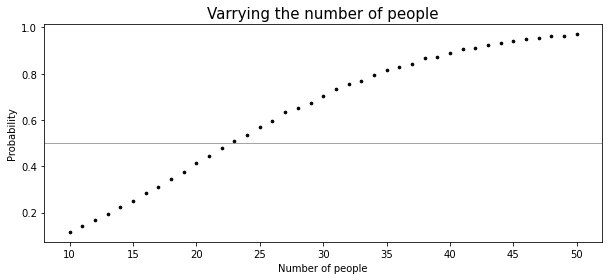

In [100]:
plt.figure(figsize=(10, 4))
plt.scatter(range(10, 51), record_people, s=7, color='black')
plt.title('Varrying the number of people', fontsize=15)
plt.xlabel('Number of people'); plt.ylabel('Probability')
plt.axhline(.5, color='red', linewidth=.5); plt.show()